# Project 3: Reddit API
# Binary Classification of Reddit Posts - Lord of the Rings and Game of Thrones
### Edith Iyer-Hernandez
#### Due Friday, December 21st

### Table of Contents

- [Executive Summary](#Executive-Summary)
    - Problem Statement
    - Data Description
    - Model Selection and Performance
    - Findings and Recommendations
- [Data Collection](#Data-Collection)
- [Data Cleaning and EDA](#Data-Cleaning)
- [Preprocessing & Modeling](#Preprocessing-Modeling)
- [Evaluation](#Evaluation)
- [Conclusion and Recommendations](#Conclusion)

<a id="Executive-Summary"></a>
# Executive Summary

## Introduction
Reddit.com is a website that serves a variety of purposes ranging from close knit communities, fandom specific groups, news content to heated political discussions and advice forums. These niche, online communities are called subreddits and each has a specific focus, set of guidelines, and moderators. Some subreddits are private, and some are public. Users can submit posts as well as upvote and comment on other posts. Due to the content specificty of each subreddit, it is possible that we can utilize natural language processing to build a classification model.  
<br>
In this notebook we seek to answer the question: Can we build a classification model to distinguish between two subreddits using natural language processing?

__________

Throughout this notebook, we explore the creation a model to distinguinsh between the __[Game of Thrones subreddit](http://reddit.com/r/asoiaf/)__ subreddit and the  __[Lord of the Rings subreddit](http://reddit.com/r/lotr/)__. Both are fantasy series with a large cult following and boast large online communities. While they share many similar motifs, eg. a quest for the true king, and dragons, they are distinct and are in fact at vastly different stages in fandom. A Song of Ice and Fire is awaiting its final installment whereas Lord of the Rings had all three books in its trilogy released by October 1955.

____________

**Data Description**
<br>
<br>
Data was collected via Reddit's API. A loop was created to pull 25 .json posts every two seconds using the requests library and an independent user agent designated as 'headers'. The .json files are automatically converted to a dictionary from which we can pull columns and rows for a dataframe containing an observation for each post, including, but not limited to, downvotes, number of comments, the text post, the text title, and the subreddit. We were mainly interested in the title, posts text, number of comments, and subreddit, our target variable. All the models to date have been created solely utilizing the post titles as features.
<br>

|Variable   |Description   | 
|---        |---           |
|headers    |user agent created to ensure connection to API| 
|lotr   |Dictionary from .json data from the LOTR API   |
|asoiaf   |Dictionary from .json data from the ASOIAF API   |
|asoiaf_df|DataFrame created from asoiaf|
|lotr_df|DataFrame created from lotr|
|df|DataFrame from combined asoiaf_df and lotr_df|
|X|DataFrame referring to features used in models|
|y|Target variable, 0 = Lord of the Rings, 1 = A Song of Ice and Fire|

____________________
***Natural Language Preprocessing***
<br>
<br>
We proceeded with natural language processing 3 different ways. 
1. CountVectorization, removing english stop words
> We utilized this method initially to see how a model would behave with very little adjustment to the title text except removing stop words.
2. Lemmatization, removing non letter characters, the subreddit names, series title words, and english stop words
> This method allowed us to look at all words except 'lotr', 'lord', 'rings', 'asoiaf', 'game', 'thrones' and english stop words.
3. Lemmatization, removing non letter characters, the subreddit names, series title words, top ranking words, and english stop words.
>Upon inspection, we found that two additional words, 'spoilers' and 'extended' were extremely high indicators of classifiying a subreddit as asoiaf. Removing these two words, allowed for a more nuanced tuning of the models.

________________

***Model Selection***
<br>
<br>
Five models were tested on the text features: 
1. Logistic Regression
2. Bagging Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. AdaBoost Classifier
<br>
________________

***Model Evaluation***
<br>
<br>
This classification problem is one that does not value one outcome over the other, it is merely one that should have the highest possible accuracy score or a low misclassification rate. 
<br>
The models all performed exceedingly well on the first two NLP methods, all with accuracy scores of over .99 on the testing data. 
<br>
On the third preprocessed dataframe, the models saw lower training and testing accuracy scores.
<br>
While Logistic Regression had the highest accuracy score, we decided to use GridSearchCV to utilize optimization of hyper parameters on the RandomForest Classifier, the Bagging Classifier, and the AdaBoost Classifier.
__________________
***Findings and Recommendations***
<br>
The final model recommendation is Logistic Regression. This is not only interpretable, but also has consistently higher accuracy scores.
<br>
Further investigation into features selection might change the recommended model; incorporation of numeric featuers such as title length, number of comments and score may change accuracy of each model. 

<a id="Data Collection"></a>
## Data Collection

In [1]:
import requests
import time
import pandas as pd

In [2]:
#Create Own User Agent
headers = {'User-agent': 'LOTR'}


#### Create a Function to scrape data from Reddit's API

In [3]:
#Create a function to scrape
def scrape_reddit(url, length):
    posts = []                 #list of posts
    after = None               #create a variable for afters
    for i in range(length):    #iterate through a number of times 
        if after == None:      
            params = {}        #params will automatically add the '?after='after'' to the url
        else:
            params = {'after': after} #The after will be pulled from the json page
            
        res = requests.get(url, params = params, headers = headers) #variable that will request the json of the inputted url, params and headers
        print(params)               #print params to ensure that all are unique
        if res.status_code == 200:  #Create if statement to handle errors
            the_json = res.json()   #create a json
            posts.extend(the_json['data']['children']) #add the desired information to the posts list
            after = the_json['data']['after'] #determine the after to use in the next iteration
        else:                     
            print(res.status_code) #else statement to handle a non 200 status_code
        time.sleep(2)              #sleep for 2 seconds in between scrapes
    
 
    return posts

***Scrape r/lotr***

In [4]:
lotr = scrape_reddit('https://www.reddit.com/r/lotr/.json', 40) #set variable

{}
{'after': 't3_a7gjvh'}
{'after': 't3_a746yi'}
{'after': 't3_a6x42m'}
{'after': 't3_a6rhb4'}
{'after': 't3_a6dnr7'}
{'after': 't3_a5uddk'}
{'after': 't3_a5wewx'}
{'after': 't3_a5cwxk'}
{'after': 't3_a4lr4s'}
{'after': 't3_a4nq76'}
{'after': 't3_a4dpxf'}
{'after': 't3_a4184t'}
{'after': 't3_a3qko4'}
{'after': 't3_a3icjs'}
{'after': 't3_a35hyq'}
{'after': 't3_a2nyk5'}
{'after': 't3_a2ewrs'}
{'after': 't3_a29wgp'}
{'after': 't3_a21fc8'}
{'after': 't3_a1d3fj'}
{'after': 't3_a1gmna'}
{'after': 't3_a1634r'}
{'after': 't3_a0kqqm'}
{'after': 't3_a0ec3x'}
{'after': 't3_9zvx0t'}
{'after': 't3_9zko9l'}
{'after': 't3_9zidwb'}
{'after': 't3_9zeksa'}
{'after': 't3_9zbbl9'}
{'after': 't3_9ytf0b'}
{'after': 't3_9ykdce'}
{'after': 't3_9y4k3d'}
{'after': 't3_9xp40g'}
{'after': 't3_9xguxz'}
{'after': 't3_9x3irj'}
{'after': 't3_9wt7l0'}
{'after': 't3_9w7uaa'}
{'after': 't3_9w3s6y'}
{'after': 't3_9vlpf1'}


***Turn Scraped Data into dataframe***

In [5]:
#Create LOTR DF
lotr_df = pd.DataFrame([lotr[i]['data'] for i in list(range(len(lotr)))])

In [6]:
#Scrape ASOIAF subreddit
asoif = scrape_reddit('https://www.reddit.com/r/asoiaf.json', 40)

{}
{'after': 't3_a7c79a'}
{'after': 't3_a6vbeq'}
{'after': 't3_a6suw5'}
{'after': 't3_a6w8j7'}
{'after': 't3_a657ju'}
{'after': 't3_a60obs'}
{'after': 't3_a5hvzq'}
{'after': 't3_a5gfjo'}
{'after': 't3_a52olo'}
{'after': 't3_a4yi3p'}
{'after': 't3_a4lm48'}
{'after': 't3_a4cht0'}
{'after': 't3_a40p79'}
{'after': 't3_a3ndv8'}
{'after': 't3_a3hi1j'}
{'after': 't3_a33080'}
{'after': 't3_a2sk37'}
{'after': 't3_a2bfil'}
{'after': 't3_a2dnoa'}
{'after': 't3_a206h1'}
{'after': 't3_a1i47j'}
{'after': 't3_a1kc23'}
{'after': 't3_a1a4zz'}
{'after': 't3_a12tl8'}
{'after': 't3_a0vf9m'}
{'after': 't3_a0lapw'}
{'after': 't3_a08b3r'}
{'after': 't3_a015r4'}
{'after': 't3_9zo1wm'}
{'after': 't3_9zfzgg'}
{'after': 't3_9z6x5k'}
{'after': 't3_9ymbw6'}
{'after': 't3_9yul97'}
{}
{'after': 't3_a7c79a'}
{'after': 't3_a6vbeq'}
{'after': 't3_a6suw5'}
{'after': 't3_a6w8j7'}
{'after': 't3_a657ju'}


In [10]:
#Create a ASOIF DataFrame
asoif_df = pd.DataFrame([asoif[i]['data'] for i in list(range(len(asoif)))])

In [35]:
asoif_df.duplicated(['selftext', 'title', 'num_comments', 'score', 'downs']).sum()

40

In [32]:
lotr_df.duplicated(['selftext', 'title']).sum()

4

<a id="Data-Cleaning"></a>
## Data Cleaning and EDA

#### Explore columns to determine which columns to keep.

In [20]:
#Concat the two data frames
df = pd.concat([asoif_df, lotr_df])
df.shape


(1970, 100)

In [21]:
#reset index
df.reset_index(drop = True, inplace=True)

In [22]:
#Drop unnecessary columns
df = df.drop(['author_cakeday', 'crosspost_parent', 'crosspost_parent_list', 'approved_at_utc', 'approved_by', 'archived', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'banned_at_utc', 'banned_by',
       'can_gild', 'can_mod_post', 'category', 'clicked',
       'content_categories', 'contest_mode', 'created', 'created_utc',
       'distinguished', 'domain', 'edited', 'gilded', 'gildings',
       'hidden', 'hide_score', 'id', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media', 'media_embed', 'media_metadata', 'media_only', 'mod_note',
       'mod_reason_by', 'mod_reason_title', 'mod_reports', 'name', 'no_follow',
       'num_crossposts', 'num_reports', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'post_hint',
       'preview', 'pwls', 'quarantine', 'removal_reason', 'report_reasons',
       'saved', 'secure_media', 'secure_media_embed',
       'selftext_html', 'send_replies', 'spoiler', 'stickied',
       'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers',
       'subreddit_type', 'suggested_sort', 'thumbnail', 'thumbnail_height',
       'thumbnail_width', 'ups', 'url', 'user_reports',
       'whitelist_status', 'wls', 'likes', 'view_count', 'visited'], axis = 1)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 8 columns):
downs           1970 non-null int64
is_self         1970 non-null bool
is_video        1970 non-null bool
num_comments    1970 non-null int64
score           1970 non-null int64
selftext        1970 non-null object
subreddit       1970 non-null object
title           1970 non-null object
dtypes: bool(2), int64(3), object(3)
memory usage: 96.3+ KB


In [29]:
#find duplicates duplicates
df.duplicated(['title', 'selftext']).sum()

171

In [38]:
#Drop Duplicates
df.drop_duplicates(['selftext', 'title', 'num_comments', 'score', 'downs'], inplace=True)

In [390]:
#Check for balanced classes
df.subreddit.value_counts(normalize = True)

0    0.513472
1    0.486528
Name: y_value, dtype: float64

In [40]:
#Replace Game of Thrones with 1 and LOTR with 0
df.subreddit = df.subreddit.map({'lotr': 0, 'asoiaf': 1})
df.subreddit.value_counts()

0    991
1    939
Name: subreddit, dtype: int64

In [41]:
#rename 'subreddit' to y_value
df.rename(index=str, columns={"subreddit": "y_value"}, inplace=True)

In [42]:
#Binarize 'is_self'
df.is_self = df.is_self.map({False : 0, True : 1})

In [43]:
#binarize 'is_video'
df.is_video = df.is_video.map({False : 0 , True : 1})

In [44]:
#Save as .csv:
df.to_csv('./reddit_scrape.csv')

### Distribution Visualization

In [45]:
#Visualize numeric distributions
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

%matplotlib inline

***Look at Distributions***

''

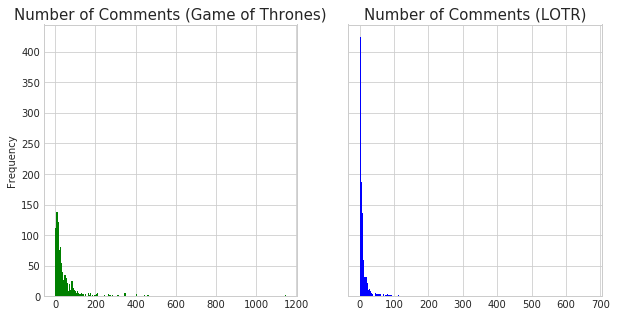

In [391]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2, sharey=True) # You'll want to specify your figsize
ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
ax[0].hist(df[df.y_value == 1]['num_comments'], bins = 200, color = 'green') # feel free to add more settings
        # Set titles, labels, etc here for each subplot
ax[0].set_title('Number of Comments (Game of Thrones)', fontsize=15)
#ax[i].set_xlabel(list_of_xlabels[i])
ax[1].hist(df[df.y_value == 0]['num_comments'], bins = 200, color = 'blue')
ax[1].set_title('Number of Comments (LOTR)', fontsize=15)
#ax[1].hist(df[df.subreddit == 1]['score'], bins = 200, color = 'dimgrey')
#ax[1].set_title('Score (GOT)')
#ax[1].hist(df[df.subreddit == 0]['score'], bins = 200, color = 'blue')
#ax[1].set_title('Score (LOTR)')
ax[0].set_ylabel('Frequency')
;

Text(0, 0.5, 'Frequency')

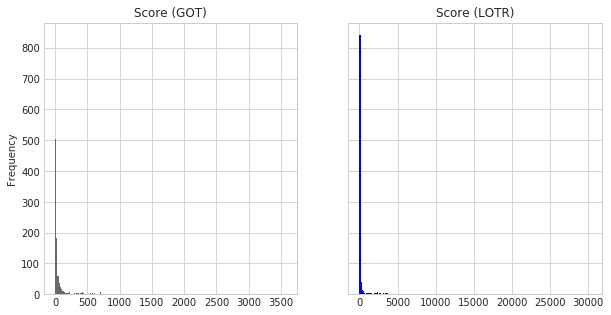

In [47]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2, sharey=True) # You'll want to specify your figsize
ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#ax[0].hist(df[df.subreddit == 1]['num_comments'], bins = 200, color = 'green') # feel free to add more settings
        # Set titles, labels, etc here for each subplot
#ax[0].set_title('Number of Comments (Game of Thrones)')
#ax[i].set_xlabel(list_of_xlabels[i])
#ax[1].hist(df[df.subreddit == 0]['num_comments'], bins = 200, color = 'blue')
#ax[1].set_title('Number of Comments (LOTR)')
ax[0].hist(df[df.y_value == 1]['score'], bins = 200, color = 'dimgrey')
ax[0].set_title('Score (GOT)')
ax[1].hist(df[df.y_value == 0]['score'], bins = 200, color = 'blue')
ax[1].set_title('Score (LOTR)')
ax[0].set_ylabel('Frequency')

Histograms of numerical data - score and number of comments- for the two subreddits show high concentration of 0 values and a long rightside trail of the distributions in all 4 cases. There is a higher 0 concentration of comments and scores for LOTR than GOT.

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
downs,1930.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
is_self,1930.0,0.646114,0.478298,0.0,0.00,1.0,1.0,1.0
is_video,1930.0,0.003109,0.055684,0.0,0.00,0.0,0.0,1.0
num_comments,1930.0,32.445078,73.317565,0.0,3.25,10.0,30.0,1147.0
score,1930.0,211.716580,1089.620560,0.0,5.00,14.0,45.0,30236.0
y_value,1930.0,0.486528,0.499948,0.0,0.00,0.0,1.0,1.0


The above description of numerical information shows that downs have no non-zero values and should also be removed. Additionally, we can see that 65% qualify as `is_self`, 0.3% qualify as `is_video`. Scores range from 0 to 30215, and number of comments range from 0 to 885.

In [49]:
#Look at comment text length and add column to df
df['text_length'] = [len(i) for i in df.selftext]
df.head()

,downs,is_self,is_video,num_comments,score,selftext,y_value,title,text_length
0,0,1,0,4,233,Please find links to all of the chapter discus...,1,(Spoilers Extended) Fire and Blood Volume I: O...,1009
1,0,1,0,34,7,Welcome to the Weekly Q &amp; A! Feel free to ...,1,(Spoilers Main) Weekly Q and A,346
2,0,1,0,75,224,So let me just preface this by saying I starte...,1,[SPOILERS PUBLISHED] I Just finished the Tales...,2864
3,0,1,0,266,333,In ACOK when Daenerys learns about the death ...,1,[Spoilers MAIN] Instances of Unreliable narrat...,2600
4,0,1,0,46,24,Listening to the World of Ice and Fire right n...,1,"[Spoilers Published] Wyverns, ice dragons, sea...",571


In [50]:
#Look at length of title and add the length to the df
df['title_length'] = [len(i) for i in df.title]
df.head()

,downs,is_self,is_video,num_comments,score,selftext,y_value,title,text_length,title_length
0,0,1,0,4,233,Please find links to all of the chapter discus...,1,(Spoilers Extended) Fire and Blood Volume I: O...,1009,68
1,0,1,0,34,7,Welcome to the Weekly Q &amp; A! Feel free to ...,1,(Spoilers Main) Weekly Q and A,346,30
2,0,1,0,75,224,So let me just preface this by saying I starte...,1,[SPOILERS PUBLISHED] I Just finished the Tales...,2864,108
3,0,1,0,266,333,In ACOK when Daenerys learns about the death ...,1,[Spoilers MAIN] Instances of Unreliable narrat...,2600,71
4,0,1,0,46,24,Listening to the World of Ice and Fire right n...,1,"[Spoilers Published] Wyverns, ice dragons, sea...",571,153


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
downs,1930.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
is_self,1930.0,0.646114,0.478298,0.0,0.00,1.0,1.0,1.0
is_video,1930.0,0.003109,0.055684,0.0,0.00,0.0,0.0,1.0
num_comments,1930.0,32.445078,73.317565,0.0,3.25,10.0,30.0,1147.0
score,1930.0,211.716580,1089.620560,0.0,5.00,14.0,45.0,30236.0
y_value,1930.0,0.486528,0.499948,0.0,0.00,0.0,1.0,1.0
text_length,1930.0,827.081865,2925.644447,0.0,0.00,168.0,622.5,40062.0
title_length,1930.0,64.398446,38.059928,4.0,39.00,56.0,80.0,298.0


***Add Cleaned CSV to repository***

In [52]:
df.to_csv('./reddit_scraped_cleaned.csv', index=False)

***Create Histograms to look at text length distribution - title and post***

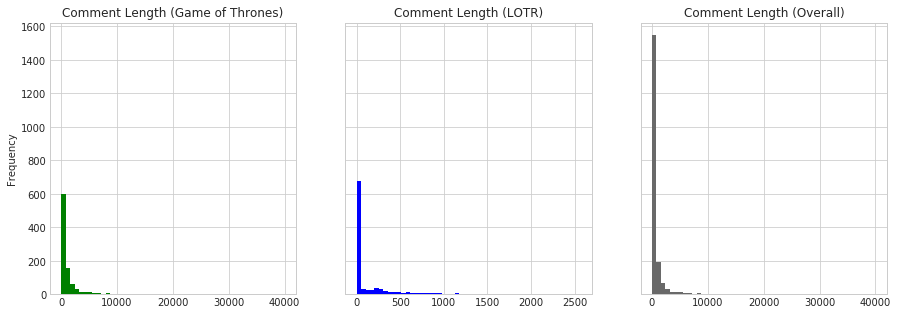

In [53]:
#Histograms of text length distribution for composite and for each subreddit
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True) # You'll want to specify your figsize
ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
ax[0].hist(df[df.y_value == 1]['text_length'], bins = 50, color = 'green') # feel free to add more settings
        # Set titles, labels, etc here for each subplot
ax[0].set_title('Comment Length (Game of Thrones)')
#ax[i].set_xlabel(list_of_xlabels[i])
ax[1].hist(df[df.y_value == 0]['text_length'], bins = 50, color = 'blue')
ax[1].set_title('Comment Length (LOTR)')
ax[2].hist(df['text_length'], bins = 50, color = 'dimgrey')
ax[2].set_title('Comment Length (Overall)')

ax[0].set_ylabel('Frequency');

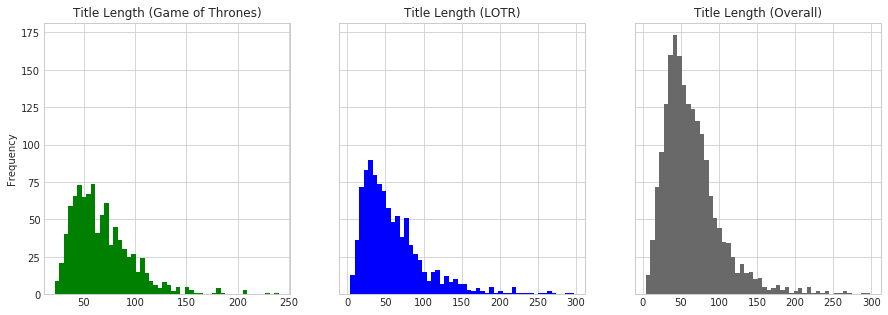

In [54]:
#Histograms of title length distribution for composite and for each subreddit
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True) # You'll want to specify your figsize
ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
ax[0].hist(df[df.y_value == 1]['title_length'], bins = 50, color = 'green') # feel free to add more settings
        # Set titles, labels, etc here for each subplot
ax[0].set_title('Title Length (Game of Thrones)')
#ax[i].set_xlabel(list_of_xlabels[i])
ax[1].hist(df[df.y_value == 0]['title_length'], bins = 50, color = 'blue')
ax[1].set_title('Title Length (LOTR)')
ax[2].hist(df['title_length'], bins = 50, color = 'dimgrey')
ax[2].set_title('Title Length (Overall)')

ax[0].set_ylabel('Frequency');

<a id="Preprocessing-Modeling"></a>
## Preprocessing and Modeling

In [143]:
#imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### CountVectorizer Preprocessing
1. Train/Test Split
2. Instantiate CountVectorizer
3. CountVectorize Title text
4. Turn vectorized text into a DataFrame
5. Instantiate Model
6. Fit Model
7. Record Score

In order to avoid rerunning the whole notebook, we have imported the cleaned pdf here to use.

In [87]:

df = pd.read_csv('./reddit_scraped_cleaned.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 10 columns):
downs           1930 non-null int64
is_self         1930 non-null int64
is_video        1930 non-null int64
num_comments    1930 non-null int64
score           1930 non-null int64
selftext        1149 non-null object
y_value         1930 non-null int64
title           1930 non-null object
text_length     1930 non-null int64
title_length    1930 non-null int64
dtypes: int64(8), object(2)
memory usage: 150.9+ KB


In [89]:
df.y_value.value_counts()

0    991
1    939
Name: y_value, dtype: int64

***Train/Test Split and CountVectorize***

In [144]:
#Train Test Split for entire DF of interest so that can append 
features = ['num_comments', 'score', 'selftext', 'title', 'text_length', 'title_length']
X = df[features]
y = df['y_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)
#Instantiate CountVectorizer
vect = CountVectorizer(stop_words='english')

#fit vect on X_train['title']
vect.fit(X_train['title'])
X_train_vect = vect.transform(X_train['title'])
X_test_vect = vect.transform(X_test['title'])

***Turn vectorized data into a dataframe***

In [145]:
X_train_vect_df = pd.DataFrame(X_train_vect.todense(), columns=vect.get_feature_names())
#here we can go back and append the other features we might want to use in our model
#did not do this yet
X_test_vect_df = pd.DataFrame(X_test_vect.todense(), columns=vect.get_feature_names())

In [146]:
X_train_vect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Columns: 2943 entries, 03 to zirakzigil
dtypes: int64(2943)
memory usage: 32.5 MB


In [147]:
X_test_vect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Columns: 2943 entries, 03 to zirakzigil
dtypes: int64(2943)
memory usage: 10.8 MB


In [151]:
cm = confusion_matrix

***Create a function that will test all 5 models and build a dictionary of values***

In [154]:
#Try multiple models and record the scores to determine any sort of changes
model_scores = []
def model_iteration(X_train, X_test, y_train, y_test, vector_method):
    scores = {}
    #logistic regresssion
    #instatiate standard scaler
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    #instantiate Logistic Regression
    lr = LogisticRegression(random_state=203)
    
    #fit logistic regression model
    lr.fit(X_train_sc, y_train)
    
    print('running logistic regresssion')
    print('Confusion Matrix for Logistic Regression:') 
    print(cm(y_test, lr.predict(X_test_sc)))
    
    #update scores dictionary
    scores['model'] = 'Logistic Regression, ' + str(vector_method)
    scores['train score'] = lr.score(X_train_sc, y_train)
    scores['test score'] = lr.score(X_test_sc, y_test)
    
    #Add Scores to the moodel_scores list
    model_scores.append(scores)
    
    #clear scores dictionary
    scores = {}
    #Decision Tree
    tree = DecisionTreeClassifier(random_state=203)
    
    tree.fit(X_train, y_train)
    
    print('running Decision Tree classifier')
    print('Confusion Matrix for Decision Tree Classifier:')  
    print(cm(y_test, tree.predict(X_test)))
    
    scores['model'] ='Decision Tree, ' + vector_method
    scores['train score'] = tree.score(X_train, y_train)
    scores['test score'] = tree.score(X_test, y_test)
    
    model_scores.append(scores)
    
    #clear scores dictionary
    scores = {}
    
    #Bagging
    bag = BaggingClassifier(random_state=203)
    
    bag.fit(X_train, y_train)
    
    print('running Bagging Classifier')
    print('Confusion Matrix for Bagging Classifier:')  
    print(cm(y_test, bag.predict(X_test)))
    
    scores['model'] = 'Bagging Classifier, ' + vector_method
    scores['train score'] = bag.score(X_train, y_train)
    scores['test score'] = bag.score(X_test, y_test)
    
    model_scores.append(scores)
    
    scores = {}
    
    ada = ada = AdaBoostClassifier(random_state=203)
    ada.fit(X_train, y_train)
    
    print('running ADA Boost Classifier')
    print('Confusion Matrix for ADA Boost Classifier:') 
    print(cm(y_test, ada.predict(X_test)))
    
    scores['model'] = 'ADA Boost Classifier' + vector_method
    scores['train score'] = ada.score(X_train, y_train)
    scores['test score'] = ada.score(X_test, y_test)
    
    model_scores.append(scores)
    
    scores = {}
    
    rf = RandomForestClassifier(random_state = 203)
    
    rf.fit(X_train, y_train)
    
    print('running Random Forest Classifier')
    print('Confusion Matrix for Random Forest Classifier:') 
    print(cm(y_test, rf.predict(X_test)))
    
    scores['model'] = 'Random Forest Classifier, ' + vector_method
    scores['train score'] = rf.score(X_train, y_train)
    scores['test score'] = rf.score(X_test, y_test)
    
    model_scores.append(scores)
    
    
    return model_scores
    

In [155]:
#Run function
model_iteration(X_train_vect_df, X_test_vect_df, y_train, y_test, 'basic count vectorization' )

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


running logistic regresssion
Confusion Matrix for Logistic Regression:
[[248   0]
 [  2 233]]
running Decision Tree classifier
Confusion Matrix for Decision Tree Classifier:
[[248   0]
 [  1 234]]
running Bagging Classifier
Confusion Matrix for Bagging Classifier:
[[248   0]
 [  1 234]]
running ADA Boost Classifier
Confusion Matrix for ADA Boost Classifier:
[[248   0]
 [  1 234]]
running Random Forest Classifier
Confusion Matrix for Random Forest Classifier:
[[248   0]
 [  1 234]]


[{'model': 'Logistic Regression, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9958592132505176},
 {'model': 'Decision Tree, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Bagging Classifier, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'ADA Boost Classifierbasic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Random Forest Classifier, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588}]

In [156]:
pd.DataFrame(model_scores)

,model,test score,train score
0,"Logistic Regression, basic count vectorization",0.995859,1.0
1,"Decision Tree, basic count vectorization",0.997930,1.0
2,"Bagging Classifier, basic count vectorization",0.997930,1.0
3,ADA Boost Classifierbasic count vectorization,0.997930,1.0
4,"Random Forest Classifier, basic count vectoriz...",0.997930,1.0


<b> The basic countvectorization method gives high accuracy scores for all five models tested. While this says that the feature selection was good, we can also tokenize and then lemmatize the words manually. This will allow us to rise to the challenge of excluding words that are part of the subreddit name. <b>



In [158]:
#look at Logistic Regression Coefficients - Can we determine which words they came from?
    #logistic regresssion
    #instatiate standard scaler
    
# use: X_train_vect_df, X_test_vect_df
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_vect_df)
X_test_sc = ss.transform(X_test_vect_df)
    
    #instantiate Logistic Regression
lr = LogisticRegression(random_state=203)
    
    #fit logistic regression model
lr.fit(X_train_sc, y_train)
lr.predict(X_test_vect_df)

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

#### Sidebar to create Data Frame of Coefficients associated with each column in the logistic regression model

In [169]:
lr.coef_.shape

(1, 2943)

In [170]:
column_list = list(X_train_vect_df.columns)

In [186]:
len(column_list)

2943

In [162]:
columns_coefficients = zip(lr.coef_, X_train_vect_df.columns)

In [187]:
coefs_list = [logreg_coefs[0][i] for i in list(range(len(logreg_coefs[0])))]

In [211]:
logreg_coefs_df = pd.DataFrame({'words': column_list, 'coefficients': coefs_list})

In [212]:
logreg_coefs_df.head()

,words,coefficients
0,03,0.026772
1,10,-0.043779
2,100,-0.037600
3,101,-0.014923
4,11,-0.002457


In [244]:
logreg_coefs_df.sort_values('coefficients', ascending = False).head()

,words,coefficients
2422,spoilers,2.138346
882,extended,1.281878
1544,main,0.809087
2027,published,0.459415
2421,spoiler,0.373532


In [245]:
logreg_coefs_df.sort_values('coefficients').head()

,words,coefficients
1517,lotr,-0.303616
1691,movie,-0.205908
2163,rings,-0.181779
1213,hobbit,-0.180191
2162,ring,-0.177501


### Lemmatizing

This will also allow us to lump words with the same root together - e.g. 'spoilers' and 'spoil'. This will hopefully give more insight into how to build a model that could be used in a larger scale model to distinguish between multiple fantasy content subreddits.

In [222]:
#Imports
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import regex as re
from nltk.corpus import stopwords # Import the stop word list

#instantiate lemmetizer
lemmatizer = WordNetLemmatizer()


In [223]:
def lemmatized_column(df, col):
    lemmatized_col = []
    for i in list(range(len(col))):
        text = col[i]
         # Remove non-letters        
        letters_only = re.sub("[^a-zA-Z]", " ", text)
        #
        # Convert to lower case, split into individual words
        words = letters_only.lower().split()
        #
        #convert the stop words to a set
        stops = set(stopwords.words('english')) 
        # 
        # Remove stop words
        meaningful_words = [w for w in words if not w in stops]
        #
        #exclude some key words
        new_stops = ['lotr', 'asoiaf', 
                     'lord', 'rings', 
                     'ring', 'game', 
                     'throne', 'thrones']
        more_meaningful_words = [w for w in meaningful_words if not w in new_stops]
        #
        lemmed_words = [lemmatizer.lemmatize(i) for i in more_meaningful_words]
        #Join the words back into one string separated by space, 
        # 
        joined_words = ' '.join(lemmed_words)
        lemmatized_col.append(joined_words)
        
    df['lemmatized'] = lemmatized_col
    return lemmatized_col

Add a column to data frame that has the newly lemmatized title so that we can utilize this with count vecotorization.

In [224]:
#Add lemmatized column with basix removal of words also associated with 
new_column= lemmatized_column(df, df.title)

In [225]:
df.columns

Index(['downs', 'is_self', 'is_video', 'num_comments', 'score', 'selftext',
       'y_value', 'title', 'text_length', 'title_length', 'lemmatized'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 11 columns):
downs           1930 non-null int64
is_self         1930 non-null int64
is_video        1930 non-null int64
num_comments    1930 non-null int64
score           1930 non-null int64
selftext        1149 non-null object
y_value         1930 non-null int64
title           1930 non-null object
text_length     1930 non-null int64
title_length    1930 non-null int64
lemmatized      1930 non-null object
dtypes: int64(8), object(3)
memory usage: 165.9+ KB


In [227]:
df.to_csv('./lemmatized_column_added.csv', index = False)

In [398]:
df[['title', 'lemmatized']].sample(10)

,title,lemmatized
558,(Spoilers Extended) Who was present during the...,present siege pyke greyjoy rebellion
1880,"Hi r/LOTR, I went to primary school with Alan ...",hi r went primary school alan lee son alan cam...
1470,I've wanted a Sindarin tattoo since I was a ki...,wanted sindarin tattoo since kid saved special...
992,“It cannot be” Goosebumps... every.... time....,cannot goosebump every time
1661,Joining the wallpaper movement!,joining wallpaper movement
1868,Under Mirrormere - John Blanche,mirrormere john blanche
1183,That scene from RotK,scene rotk
1025,An interesting look at what happened with The ...,interesting look happened hobbit
1042,"Just bought this today. Always loved the lore,...",bought today always loved lore never read book...
1639,Anyone else watching the movies this thanksgiv...,anyone else watching movie thanksgiving weekend


#### Using CountVectorization on Lemmatized column

In [228]:
#Train Test Split for entire DF of interest so that can append 
features = ['num_comments', 'score', 'selftext', 'title', 'text_length', 'title_length', 'lemmatized']
X = df[features]
y = df['y_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)
#Instantiate CountVectorizer
vect = CountVectorizer(stop_words='english')

#fit vect on X_train['title']
vect.fit(X_train['lemmatized'])
X_train_vect = vect.transform(X_train['lemmatized'])
X_test_vect = vect.transform(X_test['lemmatized'])

X_train_vect_df = pd.DataFrame(X_train_vect.todense(), columns=vect.get_feature_names())
#here we can go back and append the other features we might want to use in our model
X_test_vect_df = pd.DataFrame(X_test_vect.todense(), columns=vect.get_feature_names())

In [229]:
#iterate through each model to inspect the accuracy scores
model_iteration(X_train_vect_df, X_test_vect_df, y_train, y_test, 'custom lemmatizing')

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


running logistic regresssion
Confusion Matrix for Logistic Regression:
[[247   1]
 [  1 234]]
running Decision Tree classifier
Confusion Matrix for Decision Tree Classifier:
[[248   0]
 [  1 234]]
running Bagging Classifier
Confusion Matrix for Bagging Classifier:
[[248   0]
 [  1 234]]
running ADA Boost Classifier
Confusion Matrix for ADA Boost Classifier:
[[248   0]
 [  1 234]]
running Random Forest Classifier
Confusion Matrix for Random Forest Classifier:
[[248   0]
 [  2 233]]


[{'model': 'Logistic Regression, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9958592132505176},
 {'model': 'Decision Tree, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Bagging Classifier, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'ADA Boost Classifierbasic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Random Forest Classifier, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Logistic Regression, custom lemmatizing',
  'train score': 1.0,
  'test score': 0.9958592132505176},
 {'model': 'Decision Tree, custom lemmatizing',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Bagging Classifier, custom lemmatizing',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'ADA Boost Classifiercustom lemmatizing',
  'train score': 1

Below we can look at the scores to get a sense of how our models have changed by utilizing the subreddit title words excluded

In [230]:
pd.DataFrame(model_scores)

,model,test score,train score
0,"Logistic Regression, basic count vectorization",0.995859,1.0
1,"Decision Tree, basic count vectorization",0.997930,1.0
2,"Bagging Classifier, basic count vectorization",0.997930,1.0
3,ADA Boost Classifierbasic count vectorization,0.997930,1.0
4,"Random Forest Classifier, basic count vectoriz...",0.997930,1.0
5,"Logistic Regression, custom lemmatizing",0.995859,1.0
6,"Decision Tree, custom lemmatizing",0.997930,1.0
7,"Bagging Classifier, custom lemmatizing",0.997930,1.0
8,ADA Boost Classifiercustom lemmatizing,0.997930,1.0
9,"Random Forest Classifier, custom lemmatizing",0.995859,1.0


#### Model Evaluation
We actually see that the accuracy of all 5 models has not changed even with these exclusions. 
<br>

Below we will extract the logistic regression features as we did previously for comparison.

In [231]:
#look at Logistic Regression Coefficients - Can we determine which words they came from?
    #logistic regresssion
    #instatiate standard scaler
    
# use: X_train_vect_df, X_test_vect_df
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_vect_df)
X_test_sc = ss.transform(X_test_vect_df)
    
    #instantiate Logistic Regression
lr = LogisticRegression(random_state=203)
    
    #fit logistic regression model
lr.fit(X_train_sc, y_train)
lr.predict(X_test_vect_df)

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [237]:
X_test_vect_df.columns

Index(['abandonded', 'abeon', 'able', 'absolute', 'absolutely', 'absurd',
       'abu', 'acceptance', 'accepted', 'accepting',
       ...
       'yesterday', 'yi', 'young', 'youtube', 'youtuber', 'yr', 'yule',
       'zealand', 'zinn', 'zirakzigil'],
      dtype='object', length=2637)

In [239]:
lemmed_coefs_df = pd.DataFrame({'columns': X_test_vect_df.columns, 'lem_coefs': [lr.coef_[0][i] for i in list(range(len(lr.coef_[0])))]})

In [242]:
lemmed_coefs_df.sort_values('lem_coefs', ascending = False).head(5)

,columns,lem_coefs
2162,spoiler,2.337995
751,extended,1.291492
1355,main,0.839685
1802,published,0.487774
243,blood,0.324078


In [243]:
lemmed_coefs_df.sort_values('lem_coefs').head(5)

,columns,lem_coefs
1489,movie,-0.246145
2490,version,-0.225414
1986,sauron,-0.201635
669,edition,-0.179102
2519,wallpaper,-0.176403


#### More exclusive lemmatization - remove the words with coefficients > |1|

In [246]:
#rewrite functions to include: 'spoilers', 'extended'
def lemmatized_column(df, col):
    lemmatized_col = []
    for i in list(range(len(col))):
        text = col[i]
         # Remove non-letters        
        letters_only = re.sub("[^a-zA-Z]", " ", text)
        #
        # Convert to lower case, split into individual words
        words = letters_only.lower().split()
        #
        #convert the stop words to a set
        stops = set(stopwords.words('english')) 
        # 
        # Remove stop words
        meaningful_words = [w for w in words if not w in stops]
        #
        #exclude some key words
        new_stops = ['lotr', 'asoiaf', 
                     'lord', 'rings', 
                     'ring', 'game', 
                     'throne', 'thrones',
                     'extended', 'spoilers']
        more_meaningful_words = [w for w in meaningful_words if not w in new_stops]
        #
        lemmed_words = [lemmatizer.lemmatize(i) for i in more_meaningful_words]
        #Join the words back into one string separated by space, 
        # 
        joined_words = ' '.join(lemmed_words)
        lemmatized_col.append(joined_words)
        
    df['lemmatized'] = lemmatized_col
    return lemmatized_col

In [247]:
#Add lemmatized column with basix removal of words also associated with 
new_column_2 = lemmatized_column(df, df.title)

In [248]:
df.to_csv('./updated_lemmatized_column_added.csv', index = False)

#### Using CountVectorization on newly Lemmatized column

In [251]:
#Train Test Split for entire DF of interest so that can append 
features = ['num_comments', 'score', 'selftext', 'title', 'text_length', 'title_length', 'lemmatized']
X = df[features]
y = df['y_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)
#Instantiate CountVectorizer
vect = CountVectorizer(stop_words='english')

#fit vect on X_train['title']
vect.fit(X_train['lemmatized'])
X_train_vect = vect.transform(X_train['lemmatized'])
X_test_vect = vect.transform(X_test['lemmatized'])

X_train_vect_df = pd.DataFrame(X_train_vect.todense(), columns=vect.get_feature_names())
#here we can go back and append the other features we might want to use in our model
X_test_vect_df = pd.DataFrame(X_test_vect.todense(), columns=vect.get_feature_names())

#iterate through each model to inspect the accuracy scores
model_iteration(X_train_vect_df, X_test_vect_df, y_train, y_test, 'custom lemmatizing')

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


running logistic regresssion
Confusion Matrix for Logistic Regression:
[[230  18]
 [ 41 194]]
running Decision Tree classifier
Confusion Matrix for Decision Tree Classifier:
[[229  19]
 [ 46 189]]
running Bagging Classifier
Confusion Matrix for Bagging Classifier:
[[238  10]
 [ 54 181]]
running ADA Boost Classifier
Confusion Matrix for ADA Boost Classifier:
[[246   2]
 [ 90 145]]
running Random Forest Classifier
Confusion Matrix for Random Forest Classifier:
[[238  10]
 [ 52 183]]


[{'model': 'Logistic Regression, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9958592132505176},
 {'model': 'Decision Tree, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Bagging Classifier, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'ADA Boost Classifierbasic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Random Forest Classifier, basic count vectorization',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Logistic Regression, custom lemmatizing',
  'train score': 1.0,
  'test score': 0.9958592132505176},
 {'model': 'Decision Tree, custom lemmatizing',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'Bagging Classifier, custom lemmatizing',
  'train score': 1.0,
  'test score': 0.9979296066252588},
 {'model': 'ADA Boost Classifiercustom lemmatizing',
  'train score': 1

The removal of two words: 'spoilers' and 'extended' led to a significant decrease in accuracy. The dataframe below shows that the top models were logisitc regression and Random Forest Classifier. After inspecting the logistic regression coefficients, we will move on to try and optimize a Random Forest Classifier model and a Decision Tree Classifier model. 

In [252]:
pd.DataFrame(model_scores)

,model,test score,train score
0,"Logistic Regression, basic count vectorization",0.995859,1.000000
1,"Decision Tree, basic count vectorization",0.997930,1.000000
2,"Bagging Classifier, basic count vectorization",0.997930,1.000000
3,ADA Boost Classifierbasic count vectorization,0.997930,1.000000
4,"Random Forest Classifier, basic count vectoriz...",0.997930,1.000000
5,"Logistic Regression, custom lemmatizing",0.995859,1.000000
6,"Decision Tree, custom lemmatizing",0.997930,1.000000
7,"Bagging Classifier, custom lemmatizing",0.997930,1.000000
8,ADA Boost Classifiercustom lemmatizing,0.997930,1.000000
9,"Random Forest Classifier, custom lemmatizing",0.995859,1.000000


Logistic Regression to determine coeffients

In [254]:
#look at Logistic Regression Coefficients - Can we determine which words they came from?
    #logistic regresssion
    #instatiate standard scaler
    
# use: X_train_vect_df, X_test_vect_df
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_vect_df)
X_test_sc = ss.transform(X_test_vect_df)
    
    #instantiate Logistic Regression
lr = LogisticRegression(random_state=203)
    
    #fit logistic regression model
lr.fit(X_train_sc, y_train)
lr.predict(X_test_vect_df)

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

#### Data Frame of words and coefficients from logisitic regression after 2nd round of lemmatization.

In [255]:
new_lemmed_coefs_df = pd.DataFrame({'columns': X_test_vect_df.columns, 'new_lem_coefs': [lr.coef_[0][i] for i in list(range(len(lr.coef_[0])))]})

In [271]:
new_lemmed_coefs_df.sort_values('new_lem_coefs', ascending=False).head()

,columns,new_lem_coefs
1354,main,1.077615
243,blood,0.809214
2312,theory,0.652341
1801,published,0.648342
1204,jon,0.594635


In [258]:
new_lemmed_coefs_df.sort_values('new_lem_coefs').head()

,columns,new_lem_coefs
1488,movie,-0.514807
1985,sauron,-0.456676
1053,hobbit,-0.363597
2518,wallpaper,-0.347685
382,christmas,-0.343257


*** Look at which words had the highest coefficients ***

In [366]:
asoiaf_coefs_columns = new_lemmed_coefs_df.sort_values('new_lem_coefs', ascending=False)['columns'][:19]

In [367]:
all_coefs_columns = asoiaf_coefs_columns.append(new_lemmed_coefs_df.sort_values('new_lem_coefs', ascending=False)['columns'][-20:])

In [368]:
asoiaf_coefs_values = new_lemmed_coefs_df.sort_values('new_lem_coefs', ascending=False)['new_lem_coefs'][:19]

In [369]:
all_coefs_values = asoiaf_coefs_values.append(new_lemmed_coefs_df.sort_values('new_lem_coefs', ascending=False)['new_lem_coefs'][-20:])

In [370]:
all_coefs_values.values

array([ 1.07761495,  0.80921351,  0.6523411 ,  0.64834212,  0.59463513,
        0.54951562,  0.52190234,  0.50969947,  0.48068934,  0.44968192,
        0.42779907,  0.41526916,  0.40456103,  0.38873565,  0.37776638,
        0.37705811,  0.37549762,  0.35991106,  0.35422695, -0.24999719,
       -0.25173438, -0.2535004 , -0.25374615, -0.25564701, -0.26554132,
       -0.27638106, -0.27807744, -0.28987268, -0.29401081, -0.29721701,
       -0.30648744, -0.30944472, -0.32191938, -0.32215123, -0.34325727,
       -0.3476847 , -0.36359694, -0.45667567, -0.51480722])

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


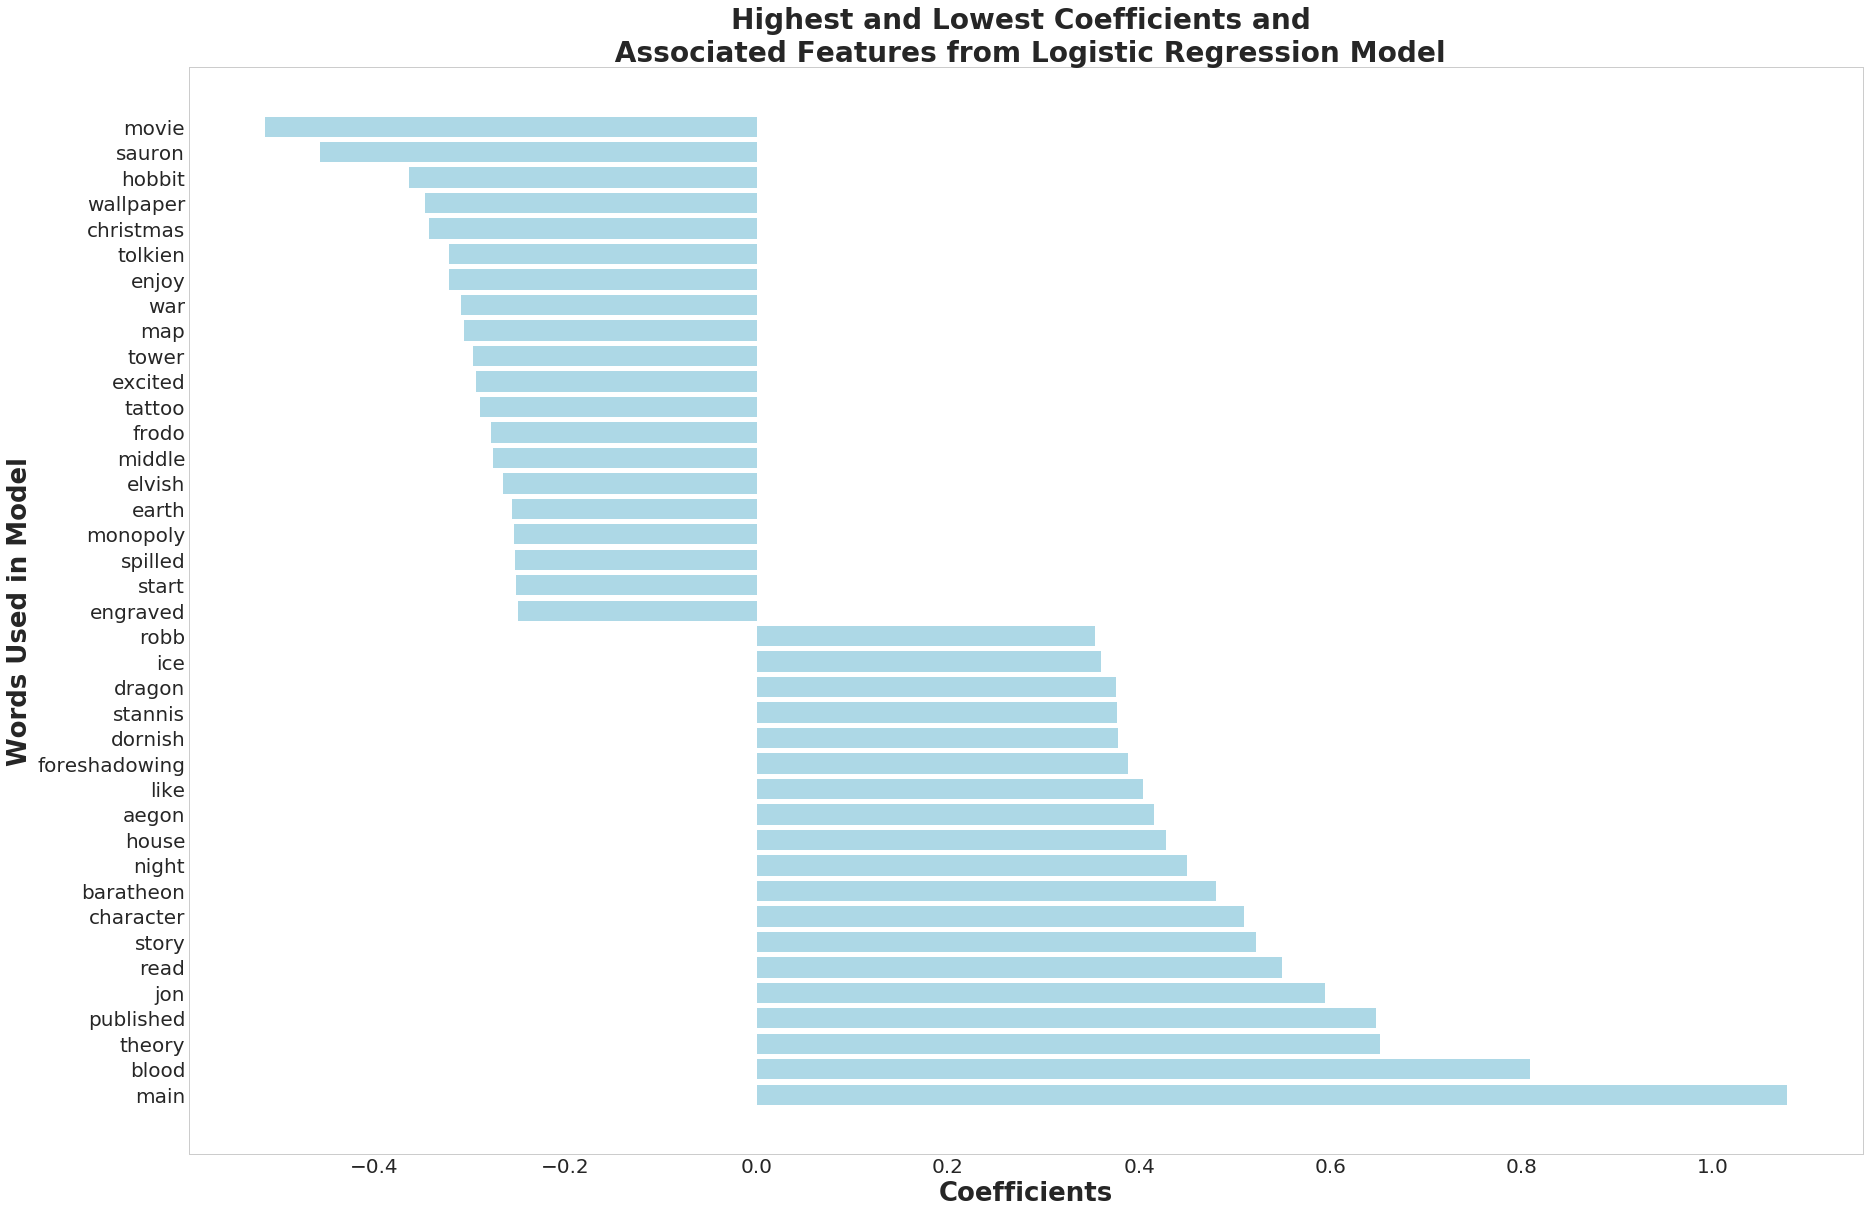

In [392]:
plt.style.use('seaborn-deep')
plt.figure(figsize = (30, 20))
plt.ylabel('Words Used in Model', fontdict={'fontsize': 26,'weight': 'bold'})
plt.xlabel('Coefficients', fontdict={'fontsize': 26, 'weight': 'bold'})
plt.title('Highest and Lowest Coefficients and \n Associated Features from Logistic Regression Model', fontdict={'fontsize':28, 'weight': 'bold'})
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
#ax.grid=False
#plt.axis('off')
plt.grid('off')
plt.barh(
    all_coefs_columns.values, 
    all_coefs_values.values, color='lightblue')
plt.savefig('./Coeffiecients.png');

### Tune Decision Tree and Random Forest Classifiers

In [310]:
random_forest_gs_results = []

In [311]:
#set cv to a k-fold object
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, random_state=203)

In [312]:
#Create a function to grid search:
#Create an empty list to store results
random_forest_gs_results = []
def gridsearch(X_train, y_train, mod, params, results_list):
    #create an empty dictionary to store the results in 
    details = {}
    #instantiate model from the mod input variable
    model = mod()
    
    #Call the model
    gs = GridSearchCV(model, param_grid = params, cv=cv) 
    #cv was defined earlier as cv = KFold(n_splits = 5, random_state = 203) to ensure random state)
    
    #fit model on the training data
    gs.fit(X_train, y_train)

    #add the information to a dictionary
    details['best score, ' + str(mod)] = {gs.best_score_ : gs.best_params_}
    
    #append the dictionary to the list to store
    results_list.append(details)
    
    
    return results_list

In [323]:
#Final Gridsearch for Random Forest
params = {
        'n_estimators': [80, 100, 120],
        'max_depth': [None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy'] 
}

gridsearch(X_train_vect_df, y_train, RandomForestClassifier, params, random_forest_gs_results)

[{"best score, <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {0.8735314443676572: {'criterion': 'entropy',
    'max_depth': None,
    'min_samples_split': 2,
    'n_estimators': 30}}},
 {"best score, <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {0.8776779543883898: {'criterion': 'entropy',
    'max_depth': None,
    'min_samples_split': 5,
    'n_estimators': 100}}},
 {"best score, <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {0.8756046993780235: {'criterion': 'entropy',
    'max_depth': None,
    'min_samples_split': 2,
    'n_estimators': 80}}},
 {"best score, <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {0.8776779543883898: {'criterion': 'entropy',
    'max_depth': None,
    'min_samples_split': 5,
    'n_estimators': 80}}}]

-  The best `n_estimators` is at the high end of the possibilities, `max_depth` was ideal at `None` and `min_samples_split` was ideal at 2. We will alter the parameters around the idea of increasing `n_estimators` and `min_samples_split`.
<br>
<br>
-  The second trial of the Random Forest GridSearchCV shows a slightly higher score - which is also higher than the initial score for RFC. We see that the `min_samples` went up to 5 but the `n_estimators` increased to 100.
<br>
<br>
-  The third test found a slightly lower accuracy score a `max_depth` of None, a `min_samples_split` of 2 and the `n_estimators` equal to 80.
<br>
<br>
-  The fourth test found an accuracy equal to the previous highest one, with a `min_samples_split` of 5 and `n_estimators` equal to 80.

In [317]:
tree_gs_results = []

In [324]:
#Decision Tree - 5th Run


params = {
        'max_depth': [None],
        'max_features': [None, 15],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 8]
       
}

gridsearch(X_train_vect_df, y_train, DecisionTreeClassifier, params, tree_gs_results)

[{"best score, <class 'sklearn.tree.tree.DecisionTreeClassifier'>": {0.8147892190739461: {'criterion': 'gini',
    'max_depth': None,
    'max_features': 5,
    'min_samples_split': 2}}},
 {"best score, <class 'sklearn.tree.tree.DecisionTreeClassifier'>": {0.8500345542501728: {'criterion': 'gini',
    'max_depth': None,
    'max_features': 20,
    'min_samples_split': 5}}},
 {"best score, <class 'sklearn.tree.tree.DecisionTreeClassifier'>": {0.8375950241879752: {'criterion': 'gini',
    'max_depth': None,
    'max_features': 12,
    'min_samples_split': 15}}},
 {"best score, <class 'sklearn.tree.tree.DecisionTreeClassifier'>": {0.8472702142363511: {'criterion': 'entropy',
    'max_depth': None,
    'max_features': 12,
    'min_samples_split': 11}}},
 {"best score, <class 'sklearn.tree.tree.DecisionTreeClassifier'>": {0.8610919143054596: {'criterion': 'entropy',
    'max_depth': None,
    'max_features': None,
    'min_samples_split': 2}}}]

The decision tree classifier model's best features were:
<br>

|Accuracy |0.861|
|---        |---           |
|Criterion   |Entropy|
|Maximum Depth|None|
|Maximum Features|None|
|Minimum Samples Split|2|

<br> 
While this model is lower than the results for the Random Forest Classifier and the Logistic Regression, it is not too much lower than those scores of 0.878.

#### ADA Boost Classifier Tuning

In [327]:
ada_gs_results = []

In [328]:
params = {
      'n_estimators': [50, 100, 150],
      'learning_rate': [1, 3, 5]
       
}

gridsearch(X_train_vect_df, y_train, AdaBoostClassifier, params, ada_gs_results)

[{"best score, <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>": {0.8403593642017968: {'learning_rate': 1,
    'n_estimators': 150}}}]

The ADA Boost Classifier showed consistently lower test accuracy scores than the other models, including decision tree and Random Forest. The train test split, however, showed less evidence of overfitting with a train score of 0.84 and a test score of 0.81. 

<a id="Evaluation"></a>
# Evaluation

The two top models for consideration are Logistic Regression and Random Forest Classifier. Both of which were able to reach an accuracy score of 0.878. Logistic Regression required no tuning, whereas Random Forest Classification did require tuning. We may be able to explore continued tuning of hyper parameters for the Random Forest Classifier to improve results in the future.

<a id="Conclusion"></a>
## Conclusion and Recommendations
The recommended model in this case is the Logistic Regression Model. The removal of the words "Spoilers" and "Extended" led to decreases in Accuracy for all models, but left Logisitic Regression as the top candidate. These words were unique to the Game of Thrones (asoiaf) subreddit - probably because the last installment of the saga will be released in April and the subreddit community is inclusive to all interested parties and therefore has "spoiler warnings" on specific posts. While Random Forest Classifier was able to be tuned to reach the same accuracy score as logistic regression, in this case, the simpler model is more logical to use. However, a more complicated problem might lend itself better to the RFC. 
<br>

***Additional research might include:*** 
 - Incorporating Numeric Features
     - Number of comments
     - Length of title
     - Average length of title
     - Score
 - Utilizing different vectorizers
     - TF-IDF
     - Hashing
 - Incorporating text of post content
     - This is challenging because most posts from the Lord of the Rings subreddit did not have actual text posts. This would require dealing with empty posts as blank strings instead of null values. 
 
 <br> 
 
It is also interesting to think about the background of the two series: LOTR was completed in 1955 whereas Game of Thrones has yet to be completed. This means that the fandoms are at different stages and from different generations. In the future, the two subreddit's may require a totally different classification model to distinguish between the two. 